In [1]:
 # These two lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../..")

# Importing GemPy
import gempy as gp

# Embedding matplotlib figures in the notebooks
%matplotlib inline

# Importing auxiliary libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from gempy.plot import visualization_2d_pro as vv

## Model interpolation

In [3]:
# Data Preparation
path_to_data = os.pardir+"/data/input_data/jan_models/"

geo_data = gp.create_data([0,1000,0,1000,0,1000],resolution=[10,10,10], 
                        path_o = path_to_data + "model5_orientations.csv",
                        path_i = path_to_data + "model5_surface_points.csv") 

Active grids: ['regular']


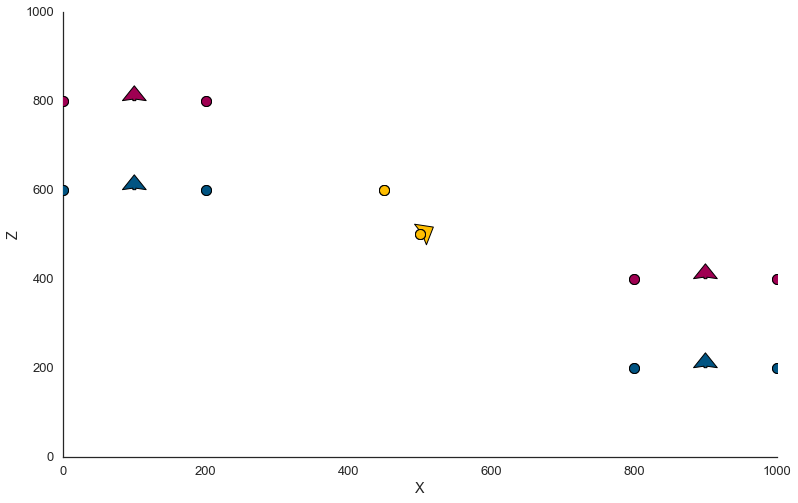

In [4]:
gp.plot.plot_data(geo_data)

[ 800. 1000.]
Active grids: ['regular' 'topography']


Grid Object. Values: 
array([[ 50.        ,  50.        ,  50.        ],
       [ 50.        ,  50.        , 150.        ],
       [ 50.        ,  50.        , 250.        ],
       ...,
       [750.        , 950.        , 932.06373103],
       [850.        , 950.        , 948.20047794],
       [950.        , 950.        , 931.87390194]])

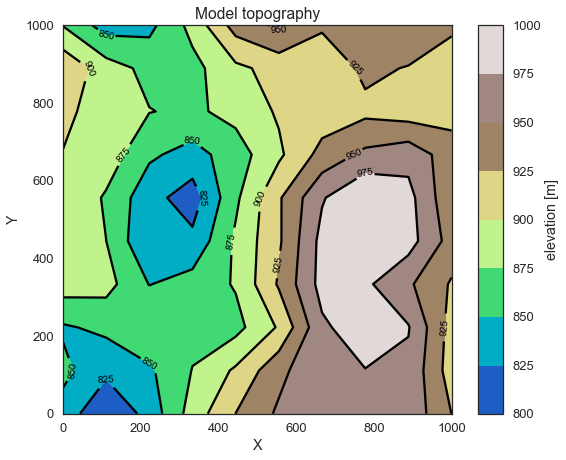

In [5]:
geo_data.set_topography()

In [6]:
section_dict = {'section1':([0,0],[1000,1000],[100,80]),
                 'section2':([800,0],[800,1000],[150,100]),
                 'section3':([50,200],[100,500],[200,150])} 

In [7]:

geo_data.set_section_grid(section_dict)

Active grids: ['regular' 'topography' 'sections']


Grid Object. Values: 
array([[  50.        ,   50.        ,   50.        ],
       [  50.        ,   50.        ,  150.        ],
       [  50.        ,   50.        ,  250.        ],
       ...,
       [ 100.        ,  500.        ,  986.57718121],
       [ 100.        ,  500.        ,  993.2885906 ],
       [ 100.        ,  500.        , 1000.        ]])

In [8]:
geo_data.grid.sections

,start,stop,resolution,dist
section1,"[0, 0]","[1000, 1000]","[100, 80]",1414.213562
section2,"[800, 0]","[800, 1000]","[150, 100]",1000.000000
section3,"[50, 200]","[100, 500]","[200, 150]",304.138127


In [9]:
gp.set_interpolation_data(geo_data, theano_optimizer='fast_compile',
                         verbose=[])

Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!


In [10]:
gp.map_series_to_surfaces(geo_data, {"Fault_Series":'fault', 
                         "Strat_Series": ('rock2','rock1')})
geo_data.set_is_fault(['Fault_Series'])

Fault colors changed. If you do not like this behavior, set change_color to False.


,isFault,isFinite
Fault_Series,True,False
Strat_Series,False,False
Basement,False,False


In [11]:
geo_data.grid.active_grids

array([ True, False,  True,  True, False])

In [12]:
gp.compute_model(geo_data);

../../gempy/core/solution.py:253: UserWarning: Attribute error. Using non masked marching cubesmarching_cubes_lewiner() got an unexpected keyword argument 'mask'.
  warnings.warn('Attribute error. Using non masked marching cubes' + str(e)+'.')


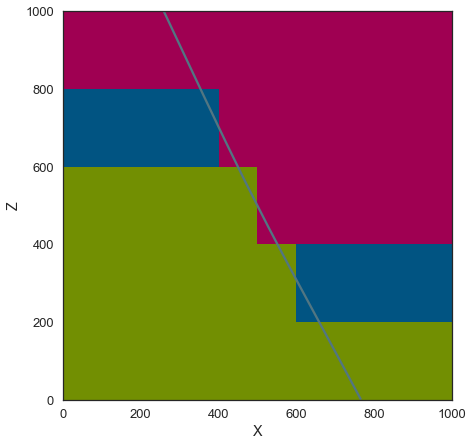

In [13]:
gp.plot.plot_section(geo_data, 0)

/Users/varga/.conda/envs/gempy/lib/python3.7/site-packages/seaborn/axisgrid.py:375: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout()
/Users/varga/.conda/envs/gempy/lib/python3.7/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()
../../gempy/plot/visualization_2d.py:200: UserWarning: the orientations are not converted to apparent dip.
  warnings.warn('the orientations are not converted to apparent dip.')


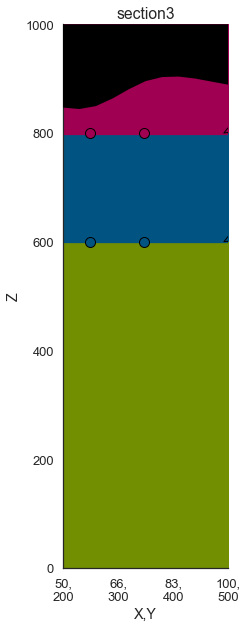

In [14]:
gp.plot.plot_section_by_name(geo_data, 'section3', show_all_data=True)

### Plot2d-Pro: Granular interface:

0.7071067811865475
1.0
1.0


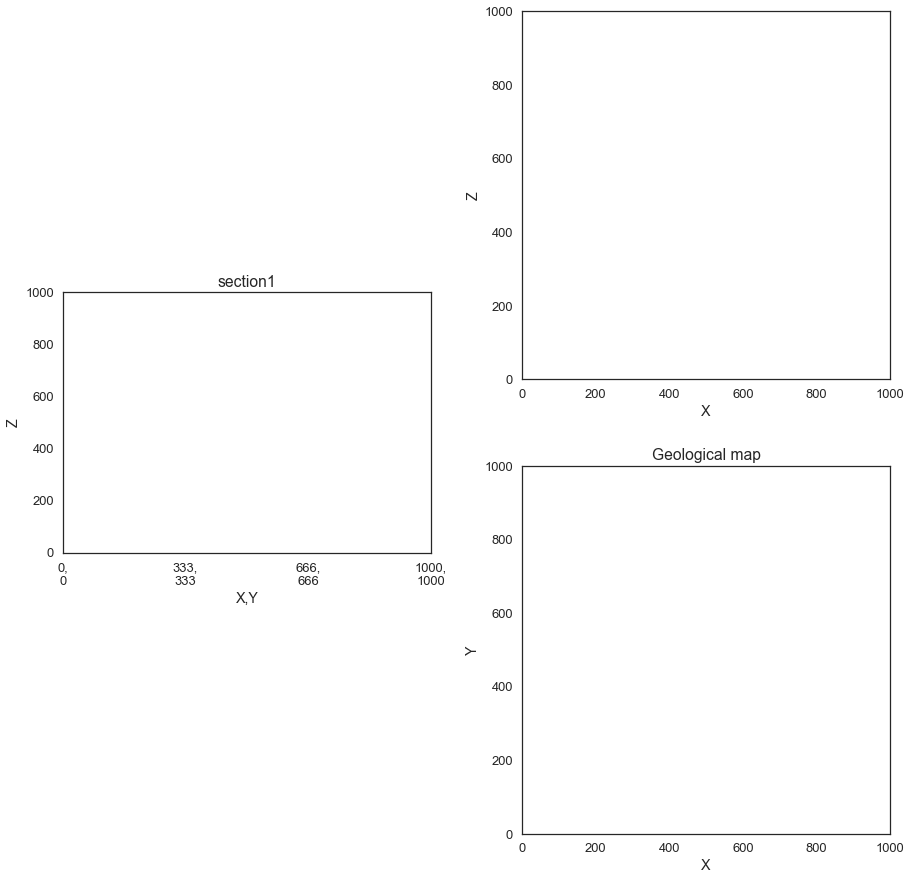

In [15]:
from importlib import reload
reload(vv)
p = vv.Plot2D(geo_data)
p.create_figure((13, 13))
#p.fig.show()

sec_name = 'section1'
sec_name_2 = 'section1'

# Create the section. This loacte the axes and give the right
# aspect ratio and labels

a = p.add_section(sec_name, ax_pos=121)
b = p.add_section(cell_number=3, ax_pos=222)
t = p.add_section('topography', ax_pos= 224)

In [16]:
# Axes 0
p.plot_contacts(a, sec_name)
p.plot_lith(a, sec_name)
p.plot_data(a, sec_name, projection_distance=200)
p.plot_topography(a, sec_name)

# # Axes 1
p.plot_contacts(b, cell_number=3)
p.plot_lith(b, cell_number=3)
p.plot_scalar_field(b, cell_number=3, sn=1)
p.plot_topography(b, cell_number=2)

# #axes2.
p.plot_lith(t, 'topography')
p.plot_scalar_field(t, 'topography', sn=1)
p.plot_data(t, 'topography')
p.plot_contacts(t, 'topography')
#p.fig.tight_layout()

0 1
1 3
p1 [0.0, 200.0] p2 [1000.0, 200.0]


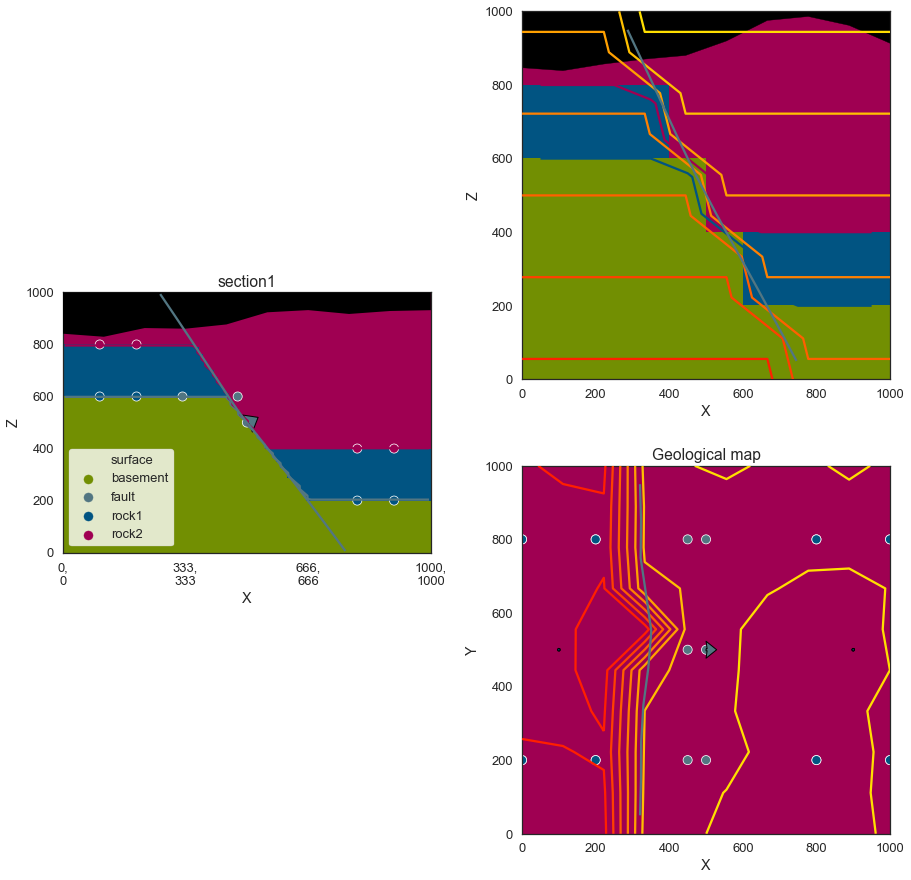

In [17]:
p.fig

##### Plotting traces:

In [18]:
from importlib import reload
reload(vv)
p = vv.Plot2D(geo_data)
p.create_figure((13, 13))
#p.fig.show()

(<Figure size 936x936 with 0 Axes>, array([], shape=(0, 0), dtype=object))

<Figure size 936x936 with 0 Axes>

In [19]:
a1 = p.add_section('topography')
p.plot_section_traces(a1)


1.0


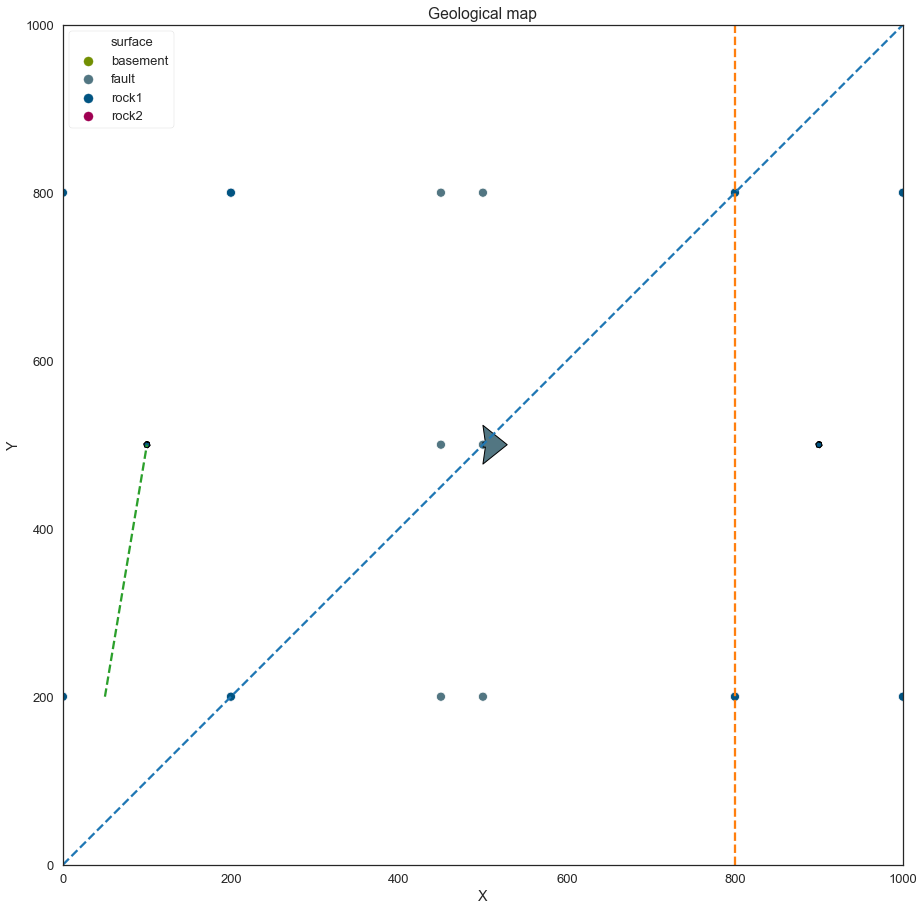

In [20]:
p.fig

### Plot API

In [38]:
from gempy.plot import plot_api as pa
from importlib import reload
reload(pa)

<module 'gempy.plot.plot_api' from '../../gempy/plot/plot_api.py'>

If nothing is passed, a Plot2D object is created and therefore you are in the same situation as above:

In [39]:
p2 = pa.plot_2d(geo_data)


<Figure size 748.8x514.8 with 0 Axes>

Alternatively you can pass section_names, cell_numbers + direction or any combination of the above:

121 1
1.0


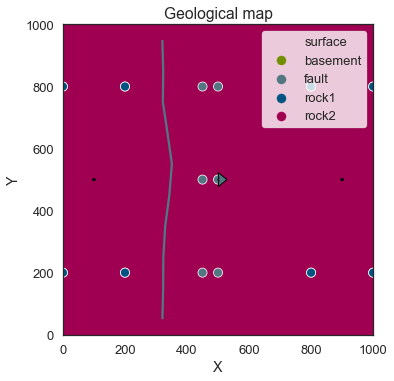

In [40]:
pa.plot_2d(geo_data, section_names=['topography'])

121 1
0.7071067811865475


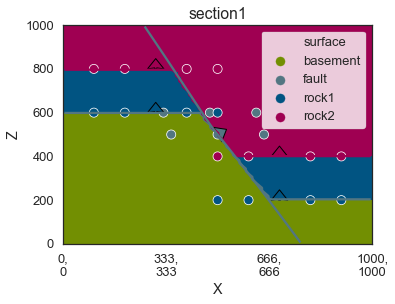

In [41]:
pa.plot_2d(geo_data, section_names=['section1'])

221 1
0.7071067811865475
222 1
1.0


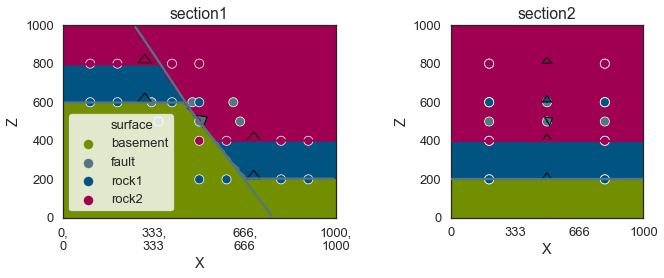

In [42]:
pa.plot_2d(geo_data, section_names=['section1', 'section2'])

221 1
0.7071067811865475
222 1
1.0
223
1.0
0 1
1 3


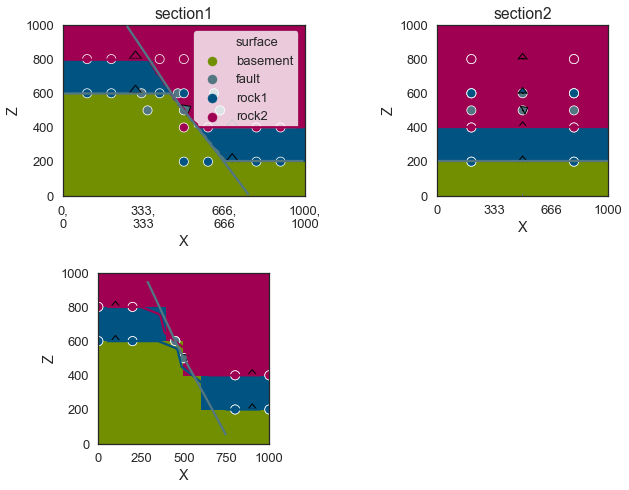

In [43]:
pa.plot_2d(geo_data, section_names=['section1', 'section2'], cell_number='mid')

In [60]:
2**20

1048576